In [24]:
from sklearn import datasets, model_selection, tree, ensemble, grid_search
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [17]:
digits = datasets.load_digits()

X_train = digits.data
y_train = digits.target

print(X_train.shape)
print(y_train.shape)

(1797, 64)
(1797,)


In [19]:
print(X_train[0])

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [21]:
print(y_train[:5])

[0 1 2 3 4]


#### 1. DecisionTreeClassifier

In [22]:
def write_answer_1(answer):
    with open('answer_1.txt', 'w') as file:
        file.write(str(answer))

In [25]:
decision_tree_clf = tree.DecisionTreeClassifier()
cross_val_score = model_selection.cross_val_score(decision_tree_clf, X_train, y_train, cv=10, n_jobs=-1)

In [28]:
print(cross_val_score)
print(cross_val_score.mean())

write_answer_1(cross_val_score.mean())

[ 0.8         0.84153005  0.83977901  0.82777778  0.79888268  0.87709497
  0.88826816  0.82022472  0.85310734  0.78409091]
0.833075562083


Качество работы одного решающего дерева обычно получается не очень высоким, но на этом датасете получилось неплохо. Обратите внимание - дерево вполне могло получиться сильно переобученным, ведь мы не ограничивали его глубину.

#### 2. BaggingClassifier

In [29]:
def write_answer_2(answer):
    with open('answer_2.txt', 'w') as file:
        file.write(str(answer))

In [30]:
bagging_clf = ensemble.BaggingClassifier(n_estimators=100)
bagging_clf.fit(X_train, y_train)

bagging_score = model_selection.cross_val_score(bagging_clf, X_train, y_train, cv=10, n_jobs=-1)

In [31]:
print(bagging_score)
print(bagging_score.mean())

write_answer_2(bagging_score.mean())

[ 0.86486486  0.95081967  0.92265193  0.93333333  0.91620112  0.98324022
  0.97206704  0.91573034  0.86440678  0.92613636]
0.92494516643


Деревья неустойчивы к изменениям в обучающей выборке, поэтому в результате усреднения по деревьям, построенным на немного разных выборках (как это происходит в бэггинге), получается более точный ответ.

#### 3. Using $\sqrt{d}$ features for fitting:

In [32]:
def write_answer_3(answer):
    with open('answer_3.txt', 'w') as file:
        file.write(str(answer))

In [33]:
opt_bagging_clf = ensemble.BaggingClassifier(n_estimators=100,
                                             max_features=int(np.sqrt(X_train.shape[1])))
opt_bagging_clf.fit(X_train, y_train)

opt_bagging_score = model_selection.cross_val_score(opt_bagging_clf, X_train, y_train, cv=10, n_jobs=-1)

In [34]:
print(opt_bagging_score)
print(opt_bagging_score.mean())

write_answer_3(opt_bagging_score.mean())

[ 0.91891892  0.95081967  0.91712707  0.87777778  0.92178771  0.94413408
  0.94972067  0.98314607  0.92090395  0.93181818]
0.931615410279


С добавлением выбора случайных признаков деревья стали различаться еще больше, в результате композиция работает лучше.

#### 4. Using $\sqrt{d}$ features for splitting every vertex:

In [35]:
def write_answer_4(answer):
    with open('answer_4.txt', 'w') as file:
        file.write(str(answer))

In [38]:
opt_decision_tree_clf = tree.DecisionTreeClassifier(max_features=int(np.sqrt(X_train.shape[1])))
opt_bagging_clf_2 = ensemble.BaggingClassifier(base_estimator=opt_decision_tree_clf, n_estimators=100)
opt_bagging_clf_2.fit(X_train, y_train)

opt_bagging_score_2 = model_selection.cross_val_score(opt_bagging_clf_2, X_train, y_train, cv=10, n_jobs=-1)

In [39]:
print(opt_bagging_score_2)
print(opt_bagging_score_2.mean())

write_answer_4(opt_bagging_score_2.mean())

[ 0.92972973  0.9726776   0.93370166  0.95        0.96089385  0.97206704
  0.98324022  0.95505618  0.92090395  0.94318182]
0.952145205289


Если выбирать случайные признаки в каждой вершине, отличия между деревьями становятся еще более существенными, что хорошо сказывается на качестве работы композиции. Именно так и устроен случайный лес.

#### 5. RandomForestClassifier() from sklearn.ensemble:

In [41]:
rf_clf = ensemble.RandomForestClassifier()
rf_clf.fit(X_train, y_train)

scores_rf_clf = model_selection.cross_val_score(rf_clf, X_train, y_train, cv=10)

In [42]:
print(scores_rf_clf)
print(scores_rf_clf.mean())

[ 0.90810811  0.95628415  0.88950276  0.87777778  0.91061453  0.93296089
  0.95530726  0.96067416  0.89830508  0.90340909]
0.919294381584


In [43]:
parameters_grid =  {
    'n_estimators' : [5, 10, 15, 30, 50, 100, 150, 200, 300, 500],
    'max_features' : [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60],
    'max_depth' : [2, 4, 6, 8, 10, 20, 30, 50, 100],
}

In [44]:
mean_scores = []

for count_estimators in parameters_grid['n_estimators']:
    score = model_selection.cross_val_score(
        ensemble.RandomForestClassifier(n_estimators=count_estimators),
        X_train,
        y_train,
        cv=10
    )
    
    mean_scores.append(score.mean())

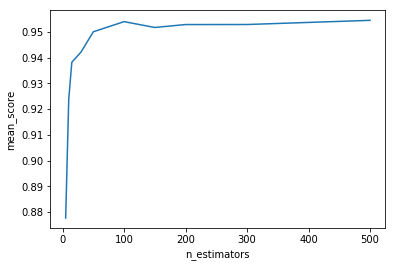

In [46]:
plt.plot(parameters_grid['n_estimators'], mean_scores)
plt.xlabel('n_estimators')
plt.ylabel('mean_score')
plt.show()

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев.


3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

In [47]:
mean_scores = []

for max_features in parameters_grid['max_features']:
    score = model_selection.cross_val_score(
        ensemble.RandomForestClassifier(max_features=max_features),
        X_train,
        y_train,
        cv=10
    )
    
    mean_scores.append(score.mean())

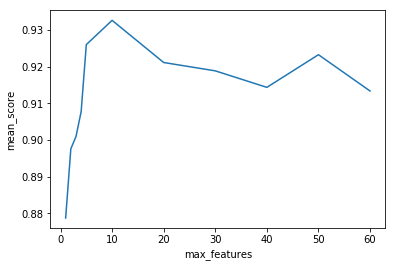

In [48]:
plt.plot(parameters_grid['max_features'], mean_scores)
plt.xlabel('max_features')
plt.ylabel('mean_score')
plt.show()

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

In [49]:
mean_scores = []

for max_depth in parameters_grid['max_depth']:
    score = model_selection.cross_val_score(
        ensemble.RandomForestClassifier(max_depth=max_depth),
        X_train,
        y_train,
        cv=10
    )
    
    mean_scores.append(score.mean())

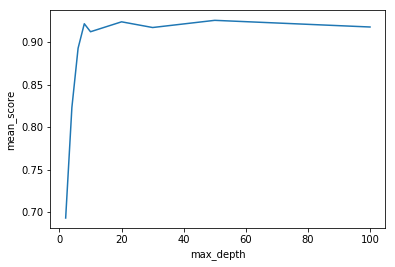

In [50]:
plt.plot(parameters_grid['max_depth'], mean_scores)
plt.xlabel('max_depth')
plt.ylabel('mean_score')
plt.show()

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).